Question 1 (a)

In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
df = pd.read_excel("Snakes.xlsx", sheet_name='Adult Tiger snakes').dropna().values
X = df[:,3]
y = df[:,5]

reg = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
print(reg.coef_, reg.intercept_)

Ypred = reg.predict(X.reshape(-1,1))
sse = np.sum(np.square(Ypred-y.reshape(-1,1))) # sum of square error
sse

[[0.05873624]] [64.0456745]


29081.74531785096

Question 1 (b)

In [53]:
from sklearn.preprocessing import PolynomialFeatures
quadratic_featurizer = PolynomialFeatures(degree=2, include_bias=False)
X_quadratic = quadratic_featurizer.fit_transform(X.reshape(-1, 1))

reg_quadratic = LinearRegression().fit(X_quadratic, y)
print(reg_quadratic.coef_, reg_quadratic.intercept_)

Ypred_quadratic = reg_quadratic.predict(X_quadratic)
sse = np.sum(np.square(Ypred_quadratic-y)) # sum of square error
sse

[ 9.89928002e-02 -3.32117126e-05] 55.314286366833336


23805.339913386662

Question 1 (c)

In [54]:
mass_average = np.mean(X)
length_average = np.mean(y)

df1 = pd.read_excel("Snakes.xlsx", sheet_name='Adult Tiger snakes')
df1.loc[:,'BODY MASS'] = df1['BODY MASS'].fillna(mass_average)
df1.loc[:,'SVL'] = df1['SVL'].fillna(length_average)

X1 = np.array(df1["BODY MASS"])
y1 = np.array(df1["SVL"])

reg1 = LinearRegression().fit(X1.reshape(-1, 1), y1.reshape(-1, 1))
print(reg1.coef_, reg1.intercept_)

Ypred1 = reg1.predict(X1.reshape(-1,1))
sse = np.sum(np.square(Ypred1-y1.reshape(-1,1))) # sum of square error
sse

[[0.05756542]] [64.58082298]


45598.581262117805

Question 1 (d)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X1, y1, label='imputed data')
plt.plot(X, Ypred, linestyle= '--', color='red', label='plot from (a)')
plt.plot(X_quadratic, Ypred_quadratic, linestyle='--', color='yellow', label='plot from (b)')
plt.plot(X1, Ypred1, linestyle='--', color='green', label='plot from (c)')

plt.xlim(0, 1600)
plt.title("Question 1 (d)")
plt.xlabel('BODY MASS')
plt.ylabel('SVL')
plt.legend()

Question 2

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df2 = pd.read_csv('reg2d.csv', header=None).values
X2 = df2[:,0:2]
y2 = df2[:,2]

quadratic_featurizer2 = PolynomialFeatures(degree=2, include_bias=False)
X2_quadratic = quadratic_featurizer2.fit_transform(X2)

reg_quadratic2 = LinearRegression().fit(X2_quadratic, y2)
print("Linear model's coefficient values of Question 2: ", reg_quadratic2.coef_,"Intercept:" , reg_quadratic2.intercept_)



# Ypred_quadratic2 = reg_quadratic2.predict(X2_quadratic)
# sse = np.sum(np.square(Ypred_quadratic2 - y2)) # sum of square error
# sse

Linear model's coefficient values of Question 2:  [-0.25697386  0.05128251  1.14226452  0.13806308  0.8996328 ] Intercept: 0.060413633787995136


Question 3 (a)

In [4]:
import pandas as pd
import numpy as np

df3 = pd.read_csv('penguins_size.csv')
mass_average = np.mean(df3['body_mass_g'])
length_average = np.mean(df3['flipper_length_mm'])

df3.loc[:,'body_mass_g'] = df3['body_mass_g'].fillna(mass_average)
df3.loc[:,'flipper_length_mm'] = df3['flipper_length_mm'].fillna(length_average)
df3.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.5,17.4,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,NaN,NaN,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.7,19.3,193.000000,3450.000000,FEMALE


Question 3 (b)

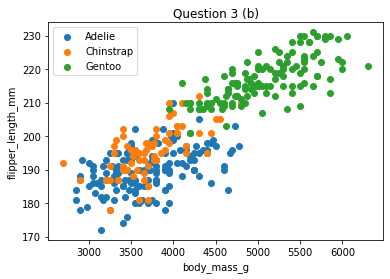

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df3[df3['species']=='Adelie']['body_mass_g'], df3[df3['species']=='Adelie']['flipper_length_mm'], label='Adelie')
plt.scatter(df3[df3['species']=='Chinstrap']['body_mass_g'], df3[df3['species']=='Chinstrap']['flipper_length_mm'], label='Chinstrap')
plt.scatter(df3[df3['species']=='Gentoo']['body_mass_g'], df3[df3['species']=='Gentoo']['flipper_length_mm'], label='Gentoo')

plt.title("Question 3 (b)")
plt.xlabel('body_mass_g')
plt.ylabel('flipper_length_mm')
plt.legend()

Question 3 (c)

In [11]:
from sklearn.model_selection import train_test_split
X3 = df3.iloc[:,4:6]
y3 = df3.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.30, random_state=617)

print(X3.shape, X_train.shape, X_test.shape)
print(y3.shape, y_train.shape, y_test.shape)

(344, 2) (240, 2) (104, 2)
(344,) (240,) (104,)


Question 3 (d)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Perform standardization by centering and scaling
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

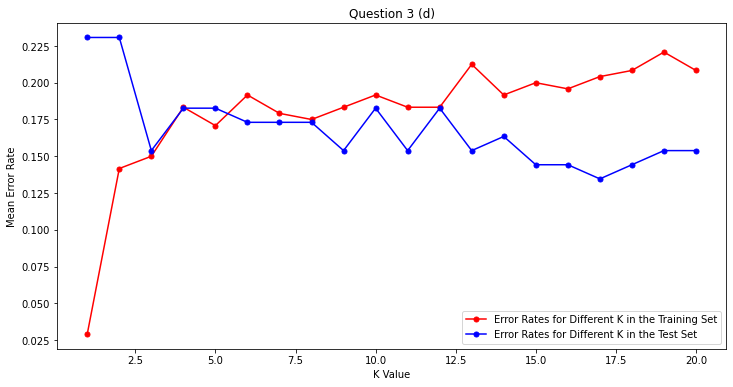

In [41]:
from sklearn.neighbors import KNeighborsClassifier

train_error = []
test_error = []
# Calculating error for K values between 1 and 21
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i_train = knn.predict(X_train)
    train_error.append(np.mean(pred_i_train != y_train))
    pred_i_test = knn.predict(X_test)
    test_error.append(np.mean(pred_i_test != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), train_error, color='red', marker='o', markersize=5, label='Error Rates for Different K in the Training Set')
plt.plot(range(1, 21), test_error, color='blue', marker='o', markersize=5, label='Error Rates for Different K in the Test Set')

plt.title('Question 3 (d)')
plt.xlabel('K Value')
plt.ylabel('Mean Error Rate')
plt.legend()

# plt.figure(figsize=(12, 6))
# plt.plot(range(1, 21), test_error, color='blue', linestyle='dashed', marker='o', markersize=10)
# plt.title('Error Rates for Different K in the Test Set')
# plt.xlabel('K Value')
# plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

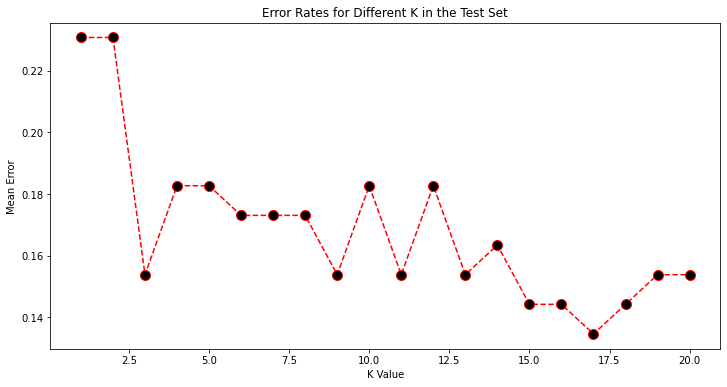

In [19]:
test_error = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    test_error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), test_error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Error Rates for Different K in the Test Set')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Question 3 (e)

The training set errors rate is:  0.029166666666666674
The test set errors rate is:  0.23076923076923073


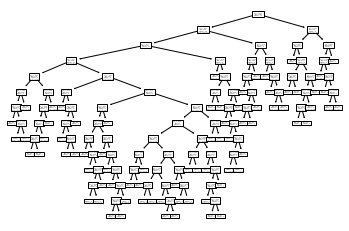

In [50]:
from sklearn import tree
from sklearn.metrics import accuracy_score
tree_model = tree.DecisionTreeClassifier(criterion='gini')
tree_model.fit(X_train, y_train)

Ypred_tree_train = tree_model.predict(X_train)
Ypred_tree_test = tree_model.predict(X_test)

tree.plot_tree(tree_model)
print("The training set errors rate is: " , 1 - accuracy_score(Ypred_tree_train, y_train))
print("The test set errors rate is: " , 1 - accuracy_score(Ypred_tree_test, y_test))